Write a program implementing a linear congruential generator
(LCG). Be sure that the program works correctly using only
integer representation.

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [147]:
#LCG
def LCG(M, a, c, N):
    xval = 3
    x = np.zeros(N)
    for i in range(N):
        xval = (a*xval + c) % M
        x[i] = xval
    x/=M
    return x

 Generate 10.000 (pseudo-) random numbers and present
these numbers in a histogramme (e.g. 10 classes).

In [148]:
M = 16
a = 5
b = 1
N = 1000

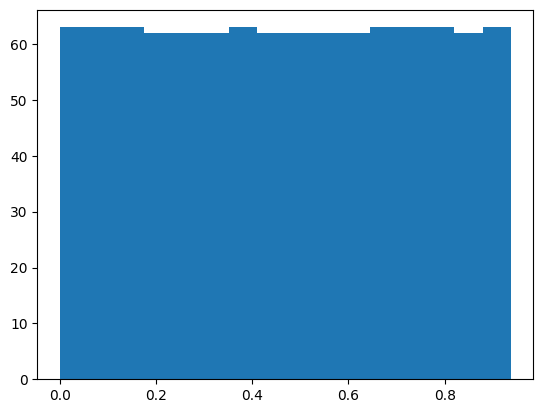

In [149]:
randn = LCG(M,a,b, N)
#plot histogram
plt.hist(randn, bins=16)
plt.show()

In [150]:
#get histogram from vector
hist, bins = np.histogram(randn, bins=M)
print(hist)

[63 63 63 62 62 62 63 62 62 62 62 63 63 63 62 63]


In [151]:
#import chi squared
from scipy.stats import chisquare
from scipy.stats import chi2
#calculate chi squared
def chisquare_test(randn, k):
    n = len(randn)
    p = 1/k
    test = 0
    for i in range(k):
        xval = randn[randn == i/k]
        ni = len(xval)
        test += (ni - n*p)**2/(n*p)     
    pval = 1 - chi2.cdf(test, k-1)
    return test, pval

In [152]:
#chisquare test with own function
chi2_test = chisquare_test(randn, M)
print(chi2_test)

#inbuilt chisquare test
chi2_test2 = chisquare(hist)
print(chi2_test2)

(0.06400000000000003, 0.9999999999999996)
Power_divergenceResult(statistic=0.064, pvalue=0.9999999999999996)


In [153]:
#Kolmogorov-Smirnov test (homemade)
def cdf(randn):
    cdf = np.arange(0,1,1/len(randn))
    return cdf
Ftrue = cdf(randn)
#import uniform distribution cdf
from scipy.stats import uniform
F = uniform.cdf(randn)
#calculate max difference
D = np.max(np.abs(Ftrue - F))
#calculate p value
n = len(randn)
pval = 1 - np.exp(-2*n*D**2)
print(D, pval)

0.992 1.0


## Run test

In [154]:
def run_test(randn, M):
    #median value
    median = np.median(randn)
    #number of observations below median
    possamps = randn < median
    negsamps = randn > median
    posruns = 0
    negruns = 0
    n1 = np.sum(possamps)
    n2 = np.sum(negsamps)
    n = n1+n2
    for i in range(len(randn)):
        if i == 0:
            continue
        if possamps[i] != possamps[i-1] and possamps[i] == True:
            posruns += 1
        if negsamps[i] != negsamps[i-1] and negsamps[i] == True:
            negruns += 1
    T = posruns + negruns
    #normal cdf

    mean = 2*n1*n2/n + 1
    var = np.exp(np.log(2)+np.log(n1)+np.log(n2)+np.log(2*n1*n2 - n)-np.log(n**2)-np.log((n-1)))
    Z = (T-mean)/np.sqrt(var)
    pval = 1 - norm.cdf(Z)
    return T, pval

In [155]:
T,p = run_test(randn, M)
print(T,p)

375 0.9999999999999992


## run test 2

In [156]:
## Run test 2
def run_test_2(randn, M):
    # up/down 
    run_lengths = []
    current_run_length = 1
    for i in range(1, len(randn)):
        if randn[i] > randn[i-1]:
            current_run_length = min(current_run_length + 1, 6)
        else:
            run_lengths.append(current_run_length)
            current_run_length = 1
    #get vector of count for each run length
    R, _ = np.histogram(run_lengths, bins=6)
    
    A  = np.array([
        [4529.4, 9044.9, 13568, 18091, 22615, 27892],
        [9044.9, 18097, 27139, 36187, 45234, 55789],
        [13568, 27139, 40721, 54281, 67852, 83685],
        [18091, 36187, 54281, 72414, 90470, 111580],
        [22615, 45234, 67852, 90470, 113262, 139476],
        [27892, 55789, 83685, 111580, 139476, 172860]
        ])
    B = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840])
    n = len(randn)
    Z = (R-B*n).T@A@(R-B*n)/(n-6)
    #chisquare test
    pval = 1 - chi2.cdf(Z, 6)
    return Z, pval

In [157]:
Z,pval = run_test_2(randn, M)
print(Z, pval)

1178065.8502868053 0.0


In [158]:
def run_test_3(randn):
    n = len(randn)
    updown = np.zeros(n-1, dtype=bool)
    for i in range(1, n):
        updown[i-1] = randn[i] > randn[i-1]
    #count number of runs
    runs = []
    current_run = 1
    for i in range(1, n-1):
        if updown[i] != updown[i-1]:
            runs.append(current_run)
            current_run = 1
        else:
            current_run += 1
    # number of unique runs
    print(runs)
    X = len(runs)
    Z = (X - (2*n-1)/3)/np.sqrt((16*n-29)/90)
    p = 2*(1 - norm.cdf(abs(Z)))
    return Z, p


In [159]:
Z,p = run_test_3(randn)
print(Z,p)

[3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 

In [160]:
def correlation_coefficient(randn, h=2):
    c = np.sum(randn[:-h]*randn[h:])/len(randn)
    Z = (c - 1/4)/np.sqrt(7/(144*len(randn)))
    p = 2*(1 - norm.cdf(abs(Z)))
    return c, p

In [161]:
c,p = correlation_coefficient(randn, h =2)
print(c,p)

0.21681640625 1.941330599830593e-06
